In [1]:
import pandas as pd

In [42]:
df = pd.read_csv('salary.csv', delimiter=';')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [44]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [45]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [46]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

YearsExperience    0.0
Salary             0.0
dtype: float64

In [47]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [48]:
X = df['YearsExperience']
y = df['Salary']

In [49]:
X[0:5]

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [50]:
y[0:5]

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [10]:
import matplotlib.pyplot as plt

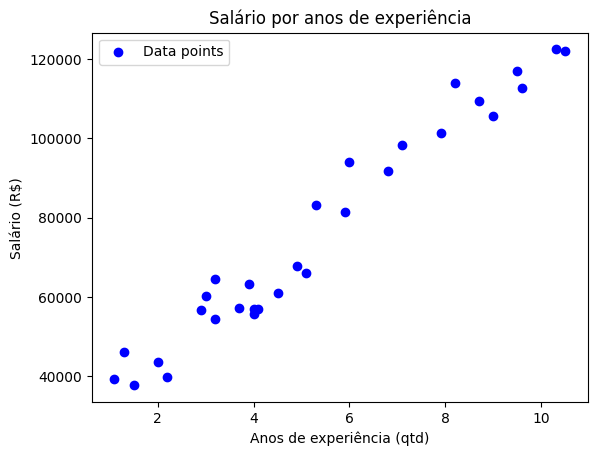

In [51]:
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('Anos de experiência (qtd)')
plt.ylabel('Salário (R$)')
plt.title('Salário por anos de experiência')
plt.legend()
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

In [54]:
X = scaler.fit_transform(X.values.reshape(-1, 1))
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [55]:
X[0:5]

array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443]])

In [56]:
y[0:5]

array([[-1.36011263],
       [-1.10552744],
       [-1.419919  ],
       [-1.20495739],
       [-1.33978143]])

In [25]:
from sklearn.svm import SVR

In [89]:
regressor = SVR(kernel='linear', gamma = 1000)
# regressor = SVR(kernel='poly', degree = 2)
# regressor = SVR(kernel='rbf', gamma = 1000)

In [30]:
import numpy as np

In [90]:
model = regressor.fit(X, np.ravel(y))

In [91]:
y_pred = model.predict(X)

In [61]:
y_pred[0:5]

array([-1.46011246, -1.39154149, -1.32297052, -1.1515431 , -1.08297213])

In [92]:
X_to_plot = scaler.inverse_transform(X)
y_to_plot = scaler.inverse_transform(y)
y_pred_to_plot = scaler.inverse_transform(y_pred.reshape(len(y_pred), 1))

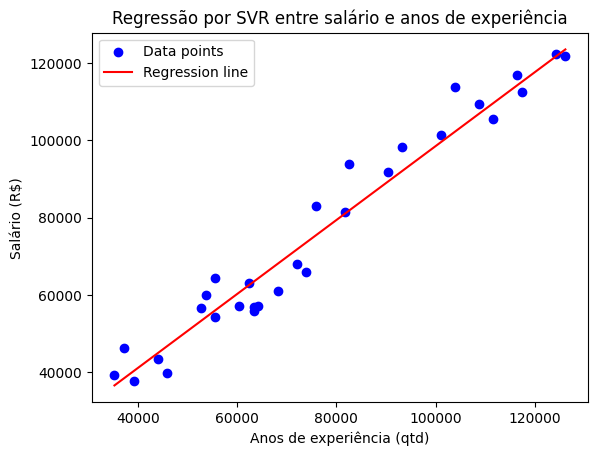

In [93]:
plt.scatter(X_to_plot, y_to_plot, color='blue', label='Data points')
plt.plot(X_to_plot, y_pred_to_plot, color='red', label='Regression line')
plt.xlabel('Anos de experiência (qtd)')
plt.ylabel('Salário (R$)')
plt.title('Regressão por SVR entre salário e anos de experiência')
plt.legend()
plt.show()

In [66]:
from sklearn.metrics import mean_squared_error, r2_score

In [94]:
mse = mean_squared_error(y_to_plot, y_pred_to_plot)
r2 = r2_score(y_to_plot, y_pred_to_plot)

In [95]:
f'Mean Squared Error: {mse}, R^2 Score: {r2}'

'Mean Squared Error: 31785960.786538515, R^2 Score: 0.9562477727634556'